<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#  Gradient Descent





In this notebook, we will learn an effective model through gradient descent, by working out the steps on our own, for a classification problem. 

For simplicity, we will consider the case of binary classification using a binary cross entropy loss.

We will use a simple logistic regression model to classify between two species of the iris dataset using a single predictor variable sepal length

## Load and explore the data

Let us load the data into a Pandas dataframe.


In [3]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Scale the features using the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the features
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add the target (species) to the DataFrame
df['target'] = iris.target

# If you want to have species names instead of numbers
df['species'] = df['target'].map({i: species for i, species in enumerate(iris.target_names)})

# Shuffle it
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

Restrict the dataframe only to those other than `setosa` and only consider the two predictor variables `sepal length` and `petal length` for now

In [4]:
restricted_df = df[df['species'] != 'setosa']
restricted_df['target'] = restricted_df['target'] - 1
restricted_df = restricted_df[['sepal length (cm)', 'petal length (cm)', 'target']].rename(columns={'sepal length (cm)': 'x', 'petal length (cm)': 'y'})


## Data Visualization

Let us first visualize a scatter plot of the data.

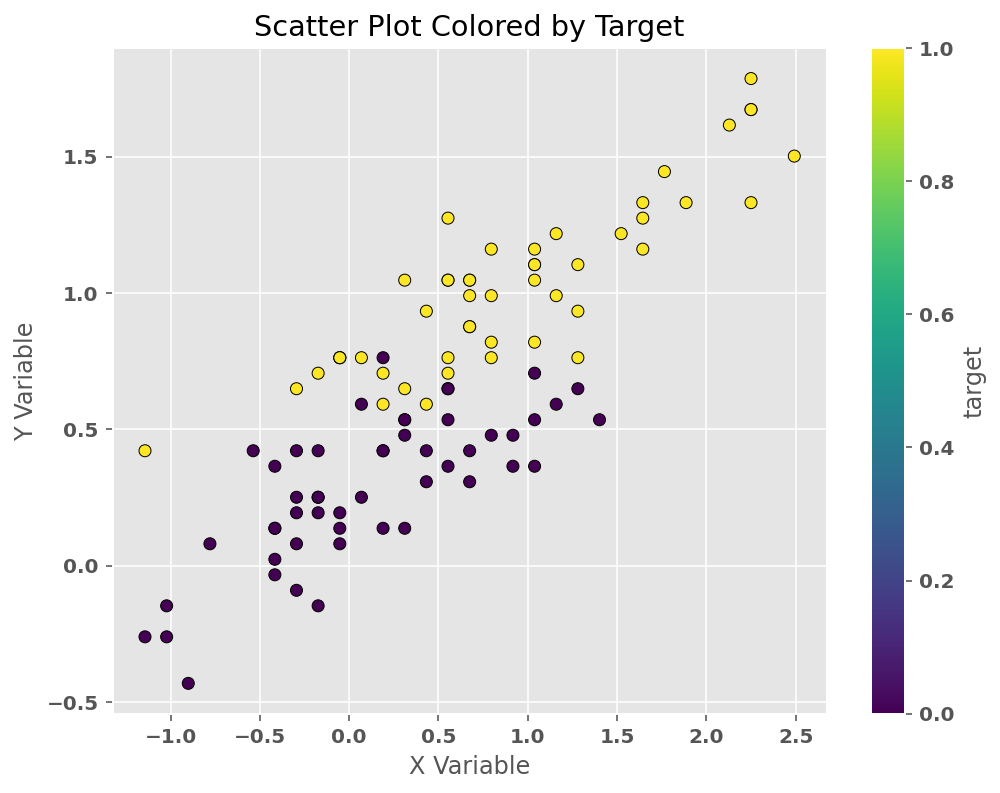

In [5]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(restricted_df['x'], restricted_df['y'], c=restricted_df['target'], cmap='viridis', edgecolor='k')

# Add a colorbar
plt.colorbar(scatter, label='target')

# Add labels and title
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot Colored by Target')

# Show the plot
plt.show()

## Gradient Descent from first principles

Recall that a step of learning is given by the equation:

\begin{align}\beta_\text{next} &= \beta - \alpha \nabla \mathscr {L(\mathbf\beta)} \\
\text{where} &: \nonumber\\
\beta &: \text{the parameter vector} \begin{pmatrix} \beta_0\\ \beta_1 \end{pmatrix}\nonumber\\
\beta_\text{next} &: \text{the next value of the parameter vector} \nonumber\\
\alpha &: \text{the learning rate} \nonumber\\
\mathscr{L(\mathbf\beta)} &: \text{the loss function}\nonumber\\
\end{align}

Let us consider the binary cross entropy function for a categorical target, in this case whether the target is 0 or 1, with only the `sepal length` as predictor.

\begin{align}\mathscr{L} &= -\sum_{i=1}^n (t_i \log( \widehat{t}_i) + (1-t_i)\ \log(1 - \widehat{t}_i))\\
&= - \sum_{i=1}^n [t_i \log(\sigma(\beta_0  + \beta_1 x_i)) + (1-t_i)  \log(1 - \sigma(\beta_0 + \beta_1 x_i))]
\end{align}


The expression for the gradient of the loss is, therefore:


\begin{equation}
\nabla \mathscr {L}(\mathbf\beta) = \begin{pmatrix} \frac{\partial L}{\partial\beta_0} \\ \frac{\partial L}{\partial\beta_1} \end{pmatrix} 
\end{equation}


Let us work out each of the component derivatives:

\begin{align}\frac{\partial \mathscr L}{\partial \beta_0} &= - \sum_{i=1}^n (t_i  (1 - \widehat{t}_i) - (1-t_i)\widehat{t}_i)\\
\frac{\partial \mathscr L}{\partial \beta_1} &= - \sum_{i=1}^n (t_i  (1 - \widehat{t}_i) - (1-t_i)\widehat{t}_i)  x_i\\
\end{align}

Therefore, the gradient descent step can be expressed as:

\begin{align}
\beta_{0, next} &= \beta_0 + \alpha\sum_{i=1}^n (t_i  (1 - \widehat{t}_i) - (1-t_i)\widehat{t}_i)\\
\beta_{1, next} &= \beta_1 + \alpha\sum_{i=1}^n (t_i  (1 - \widehat{t}_i) - (1-t_i)\widehat{t}_i)  x_i
\end{align}


We are going to perform a batch gradient descent, i.e. use all of the training data to compute loss in each step. Let us start with a small learning rate, say $\alpha = 10^{-5}$. We need a stopping criterion for our learning process.

For simplicity, let us stop after say 400 epochs, i.e. running the gradient descent for a two hundred steps.

**Definition: EPOCH**
While training, an epoch is a complete cycle through the entire dataset. In other words, each datum in the dataset should have contributed to the learning in that cycle.

In [6]:
α = pow(10, -3)
β_0, β_1 =  4, 4 #np.random.normal(0,5,2) # initialize the parameters to some random values.
epochs = 400
X, T = restricted_df['x'].values, restricted_df['target'].values
α, β_0, β_1, epochs

(0.001, 4, 4, 400)

In [7]:
def sigmoid (x):
    return np.exp(x)/(1+np.exp(x))


In [8]:
intermediates = pd.DataFrame(columns=['epoch', 'β0', 'β1', 'loss'])

for epoch in range(epochs+1):
    
    # compute the gradients
    dβ_0    = -sum([(ti *(1 - sigmoid(β_0 + β_1*xi)) - (1-ti) * (sigmoid(β_0 + β_1*xi))) for xi, ti in zip (X, T)]) 
    dβ_1    = -sum([xi*(ti *(1 - sigmoid(β_0 + β_1*xi)) - (1-ti) * (sigmoid(β_0 + β_1*xi))) for xi, ti in zip (X, T)])
    
    # gradient descent step
    β_0     = (β_0 - α*dβ_0)
    β_1     = (β_1 - α*dβ_1)
    
    # update the loss function
    loss    = -sum([ (ti * np.log(sigmoid(β_0 +β_1*xi)) + (1-ti) * np.log(1-sigmoid(β_0 +β_1*xi)))for xi, ti in zip (X, T)])
    
    # store the values for later visualization
    intermediates.loc[intermediates.shape[0]] = [epoch, β_0, β_1, loss]

Let us preview some of the rows of data.

In [9]:
pd.set_option("display.precision", 3)     
intermediates

,epoch,β0,β1,loss
0,0.0,3.954,3.991,226.153
1,1.0,3.909,3.982,224.007
2,2.0,3.864,3.973,221.870
3,3.0,3.818,3.963,219.742
4,4.0,3.773,3.954,217.623
...,...,...,...,...
396,396.0,-0.877,1.774,55.317
397,397.0,-0.877,1.773,55.317
398,398.0,-0.877,1.772,55.317
399,399.0,-0.876,1.772,55.316


## Parameter optimization with epochs

Let us now see how the learning of the parameters $\beta_0$ and $\beta_1$ happens with each epoch.

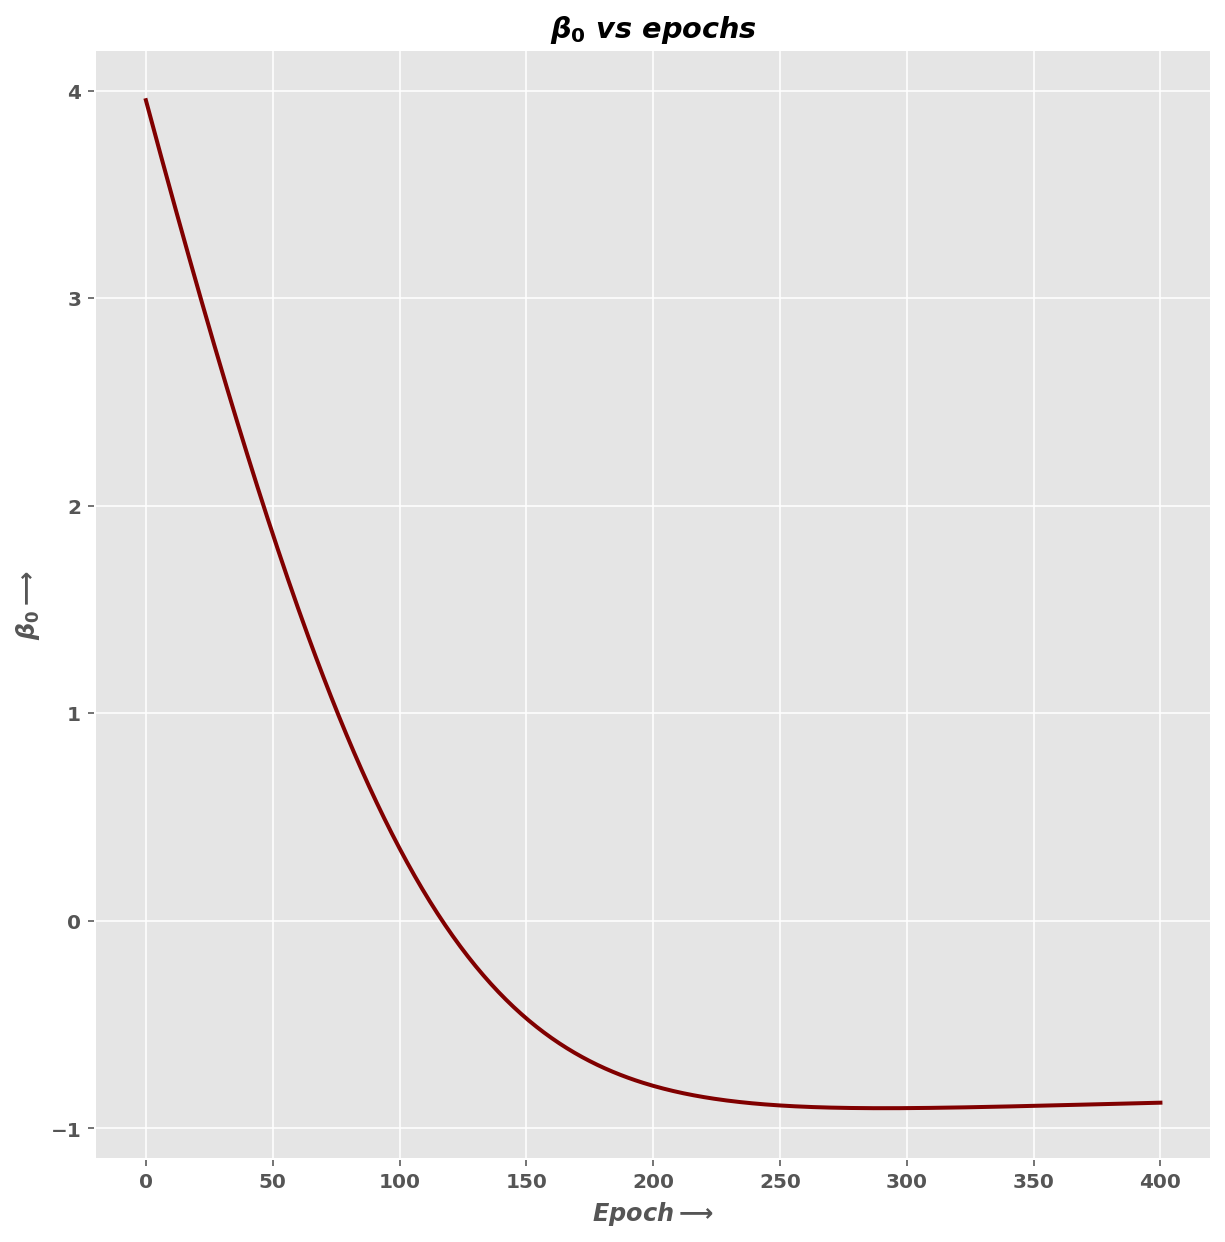

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(intermediates.epoch, intermediates.β0, linewidth=2, alpha=1, color='maroon')
plt.xlabel(r'$Epoch\longrightarrow$')
plt.ylabel(r'$\beta_0\longrightarrow$')
plt.title(r"""$\beta_0\ vs\ epochs$""")

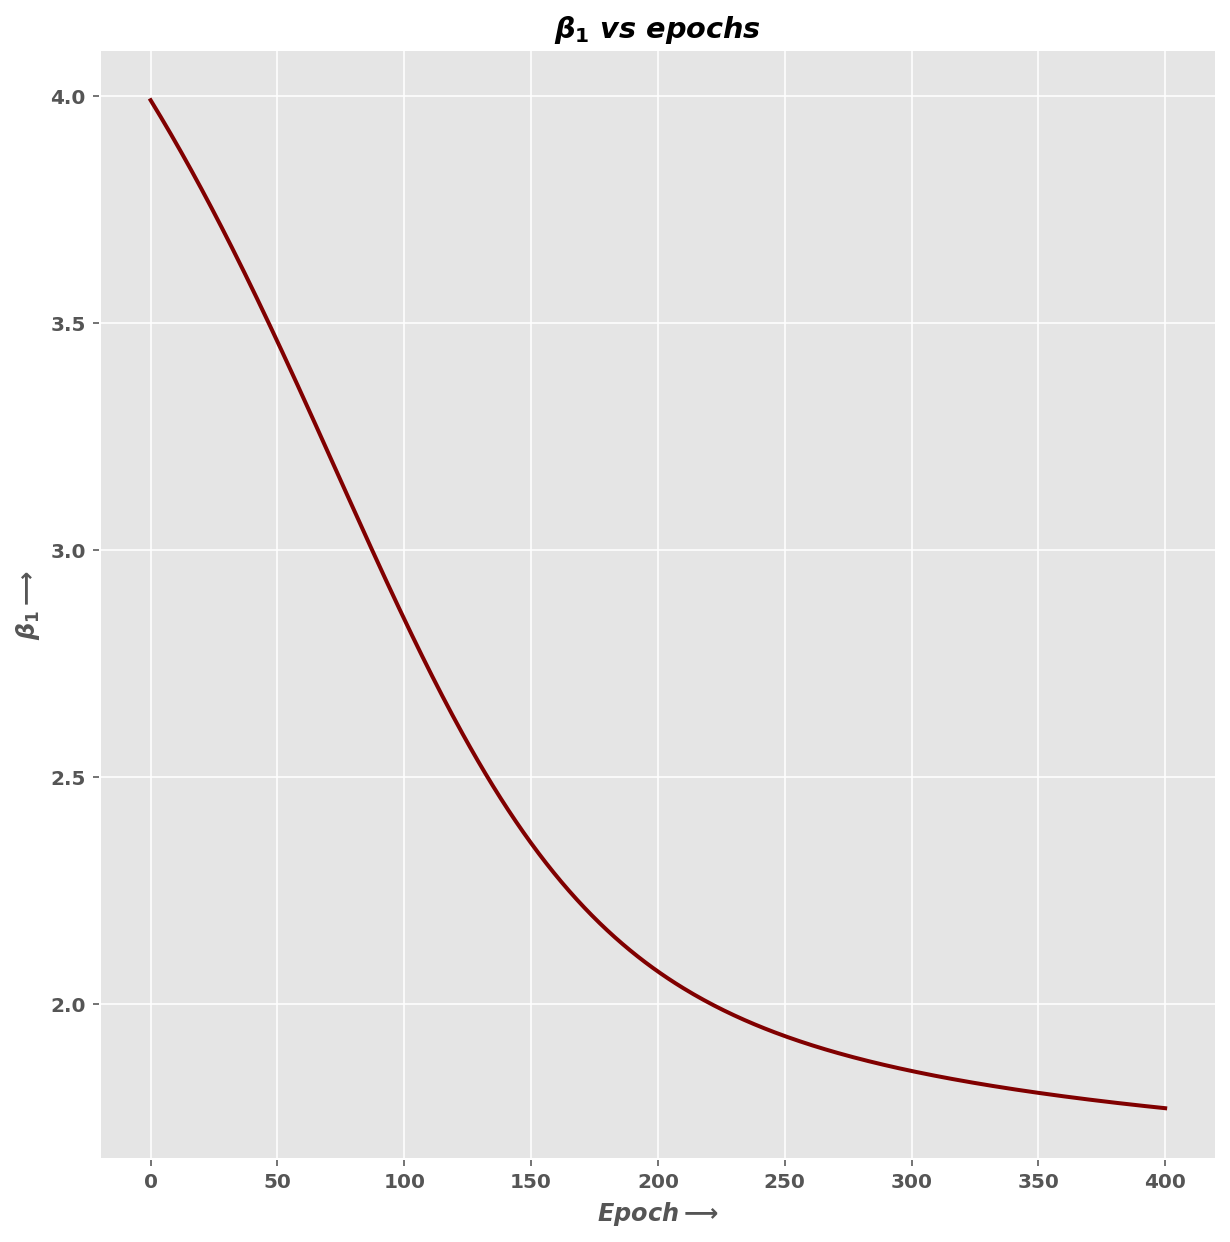

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(intermediates.epoch, intermediates.β1, linewidth=2, alpha=1, color='maroon')
plt.xlabel(r'$Epoch\longrightarrow$')
plt.ylabel(r'$\beta_1\longrightarrow$')
plt.title(r"""$\beta_1\ vs\ epochs$""")

Also, let us see how the loss (binary cross entropy loss) decreased with the epochs.

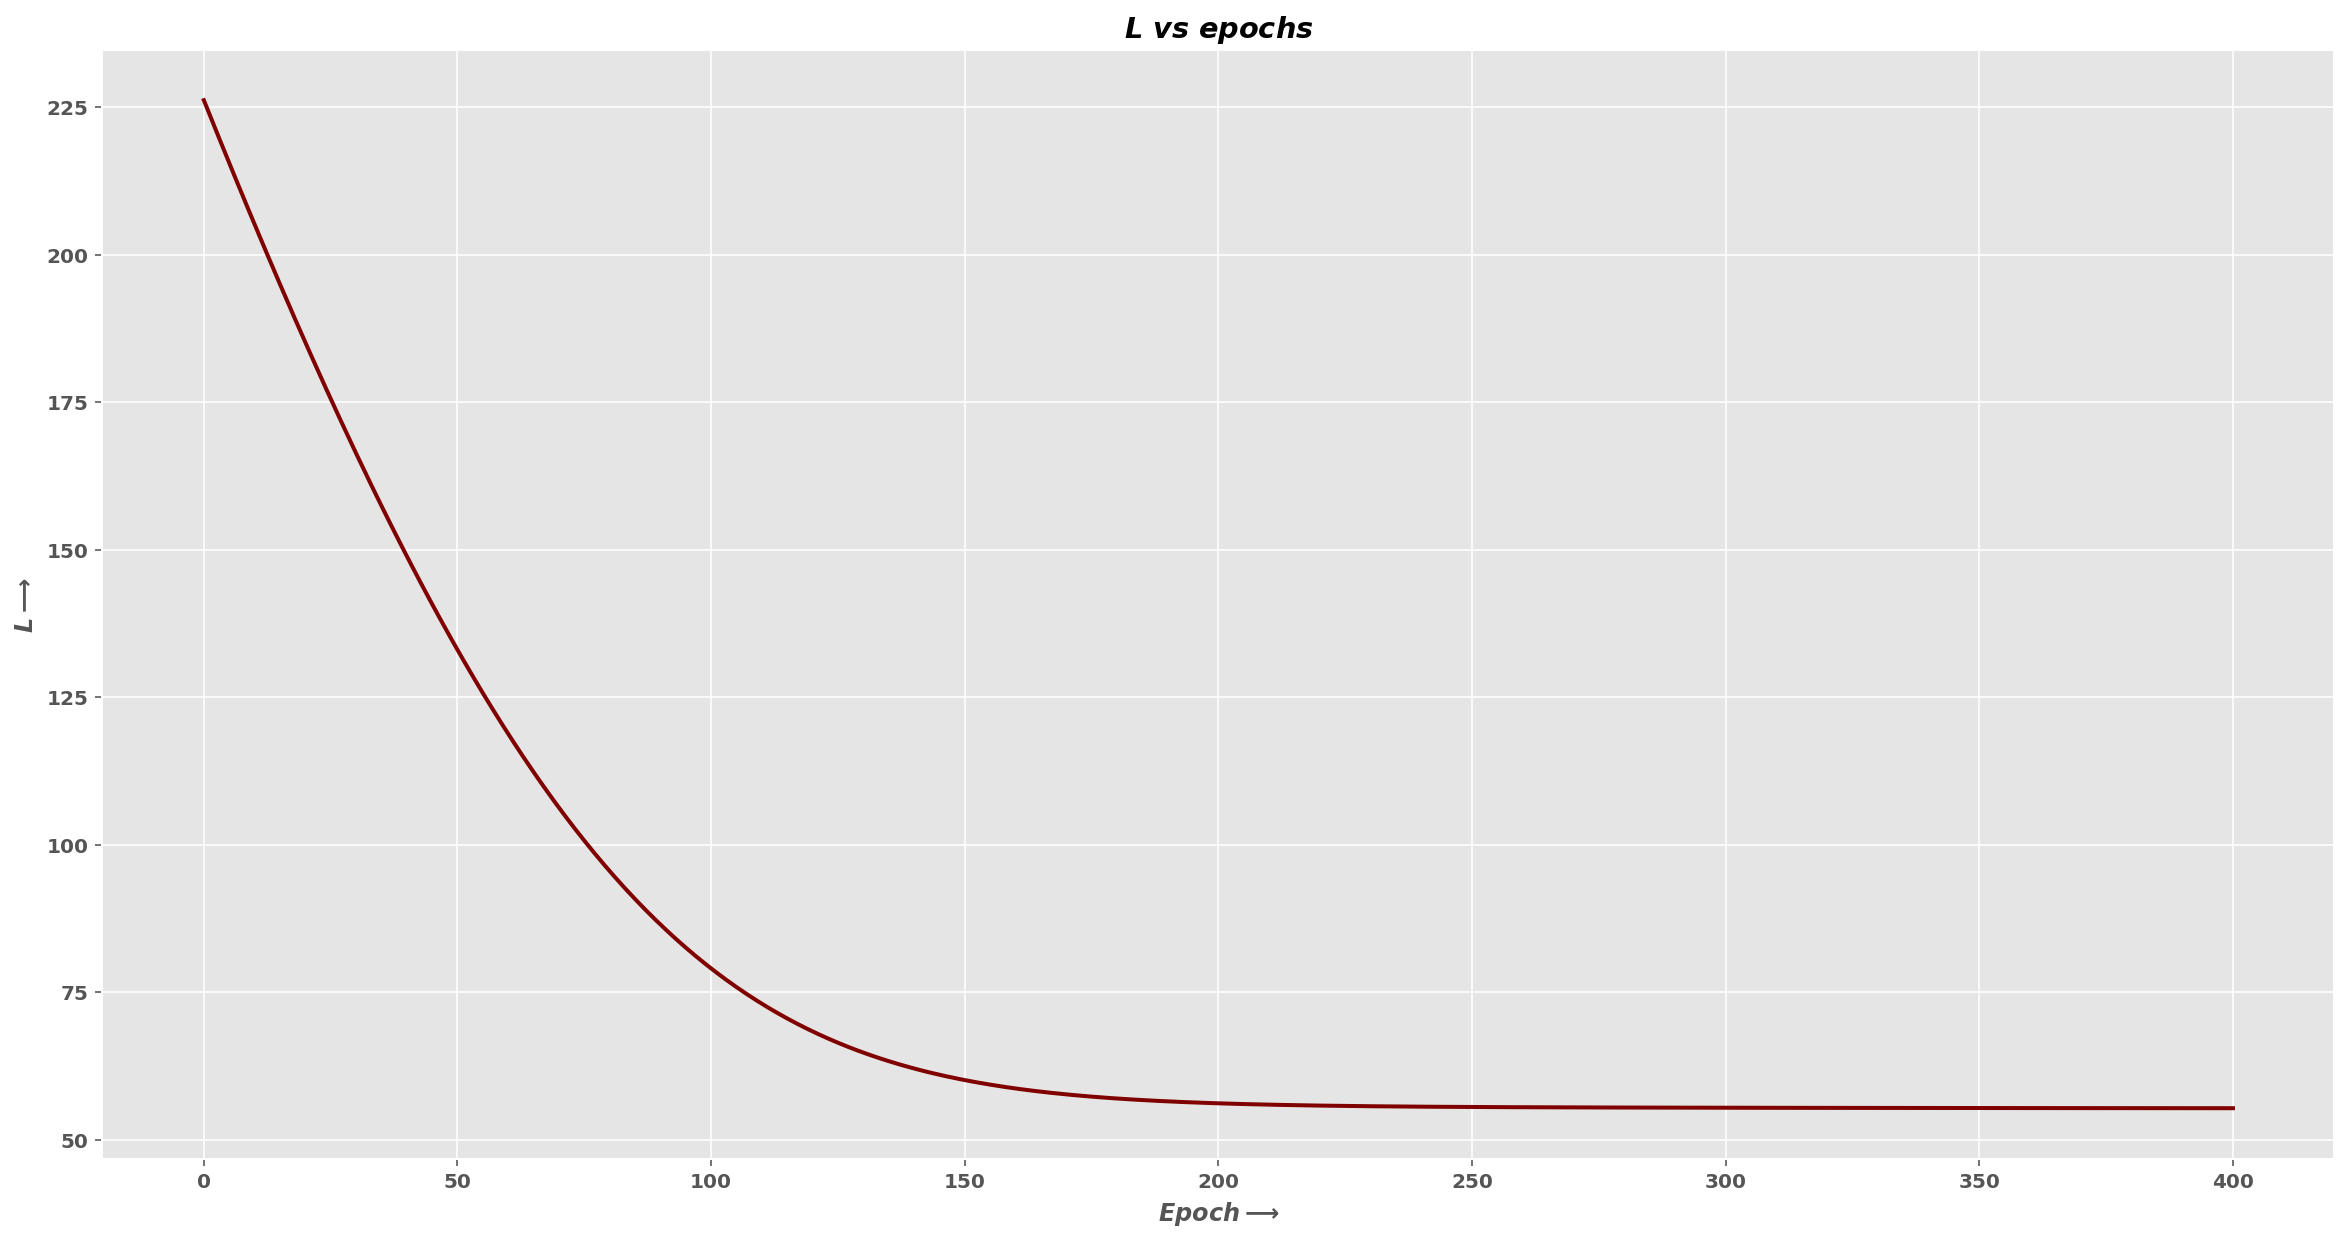

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(intermediates.epoch, intermediates.loss, linewidth=2, alpha=1, color='maroon')
plt.xlabel(r'$Epoch\longrightarrow$')
plt.ylabel(r'$L\longrightarrow$')
plt.title(r"""$L\ vs\ epochs$""")

## Loss contour plots in the parameter space

Let us start by creating a grid mesh of points in the hypothesis space, each point corresponding to a particular hypothesis's parameter value $\beta = \begin{pmatrix}\beta_0 \\ \beta_1 \end{pmatrix}$. Next, let us compute the value of the loss function, $\mathscr{L}$, as the sum-squared errors at each of these points.

### Loss Contour plot

In [13]:
def loss(β0:float, β1:float) -> float:
     return -sum([ (ti * np.log(sigmoid(β0 +β1*xi)) + (1-ti) * np.log(1-sigmoid(β0 +β1*xi)))for xi, ti in zip (X, T)])

# Create the mesh grid of values.
b0     = np.linspace(-6, 6, 1000)
b1     = np.linspace(-3,9,1000)
B0, B1 = np.meshgrid(b0, b1)
rss    = loss(B0, B1)

Let us look at the contour surfaces (curves of equal loss or errors). Because we had standardized the data, the contour plot is elliptic with low eccentricity, i.e. almost circular; however, because we have drawn the plot in a 2:1 ratio, it looks more elliptical than it is. Change the plot size below to a square (20,20) for the figure size, and see what happens.

Text(0.5, 1.0, 'Loss function contour plot')

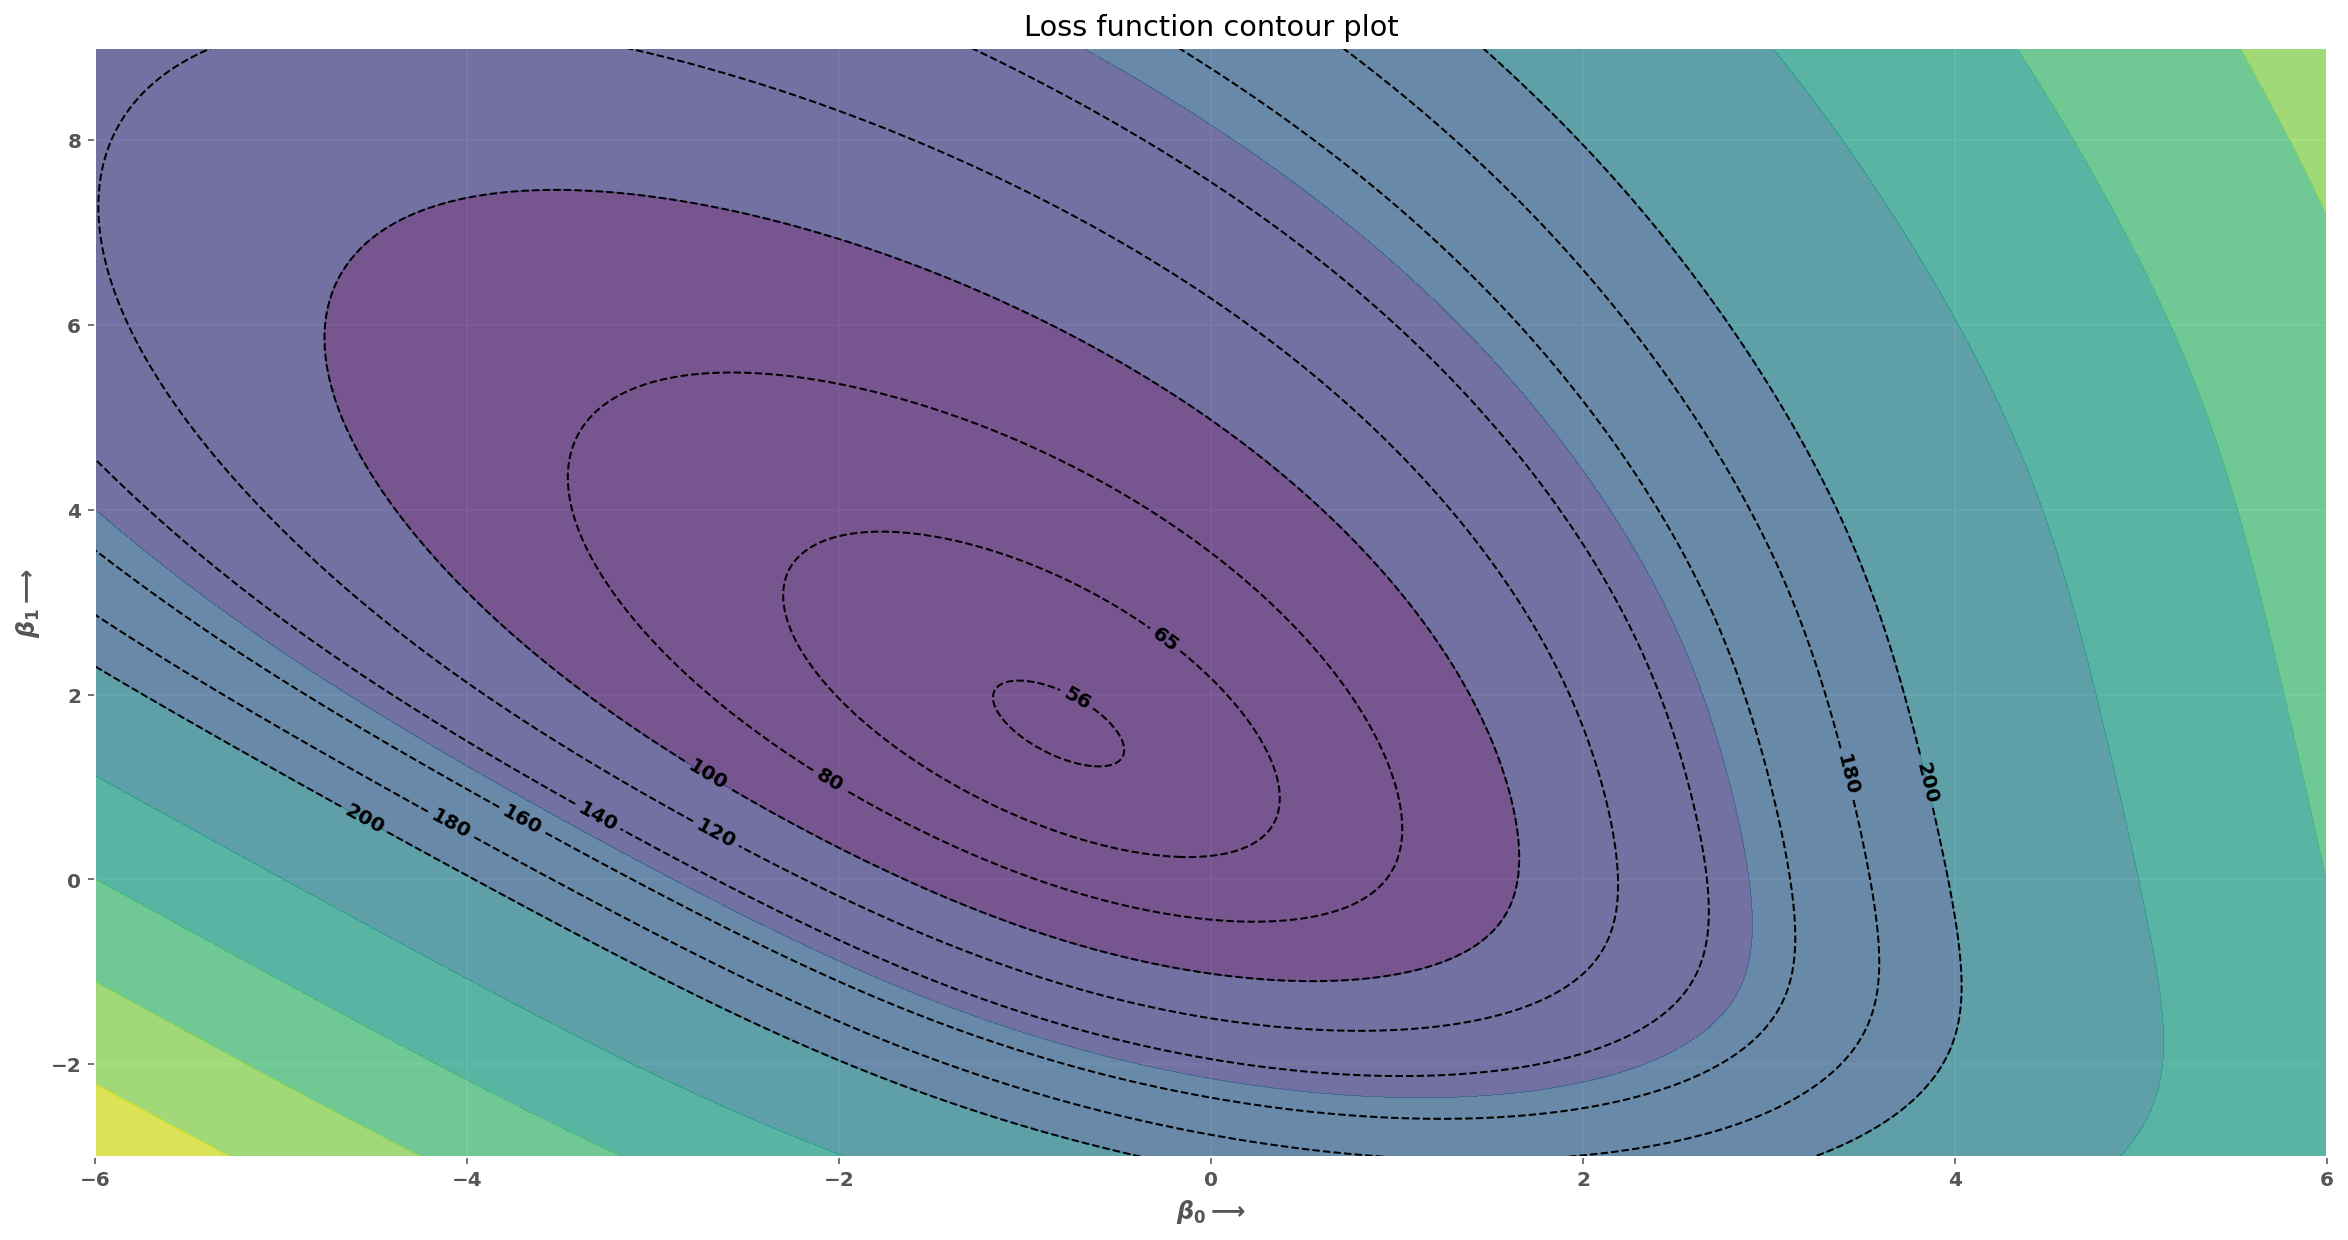

In [14]:
levels=[56, 65, 80, 100, 120, 140, 160, 180, 200]
plt.figure(figsize=(20,10))
contour_plot = plt.contour(B0, B1, rss, levels, colors='black', linestyles='dashed', linewidths=1, )
plt.clabel(contour_plot, inline=1, fontsize=10)
contour_plot = plt.contourf(B0, B1, rss,alpha=0.7)
plt.xlabel(r'$\beta_0\longrightarrow$')
plt.ylabel(r'$\beta_1\longrightarrow$')
plt.title(r'Loss function contour plot')

### Loss surface and the contour plots in the parameter plane

Let us see the relationship between the loss surface, and its projection on the $\beta$-hyperplane. 

**Note: in order to show the loss surface above the contour plot, we have artificially added 2000 to the residual loss, in order to lift the loss surface. To see the correct loss surface, reset the `loss_lift` to zero**

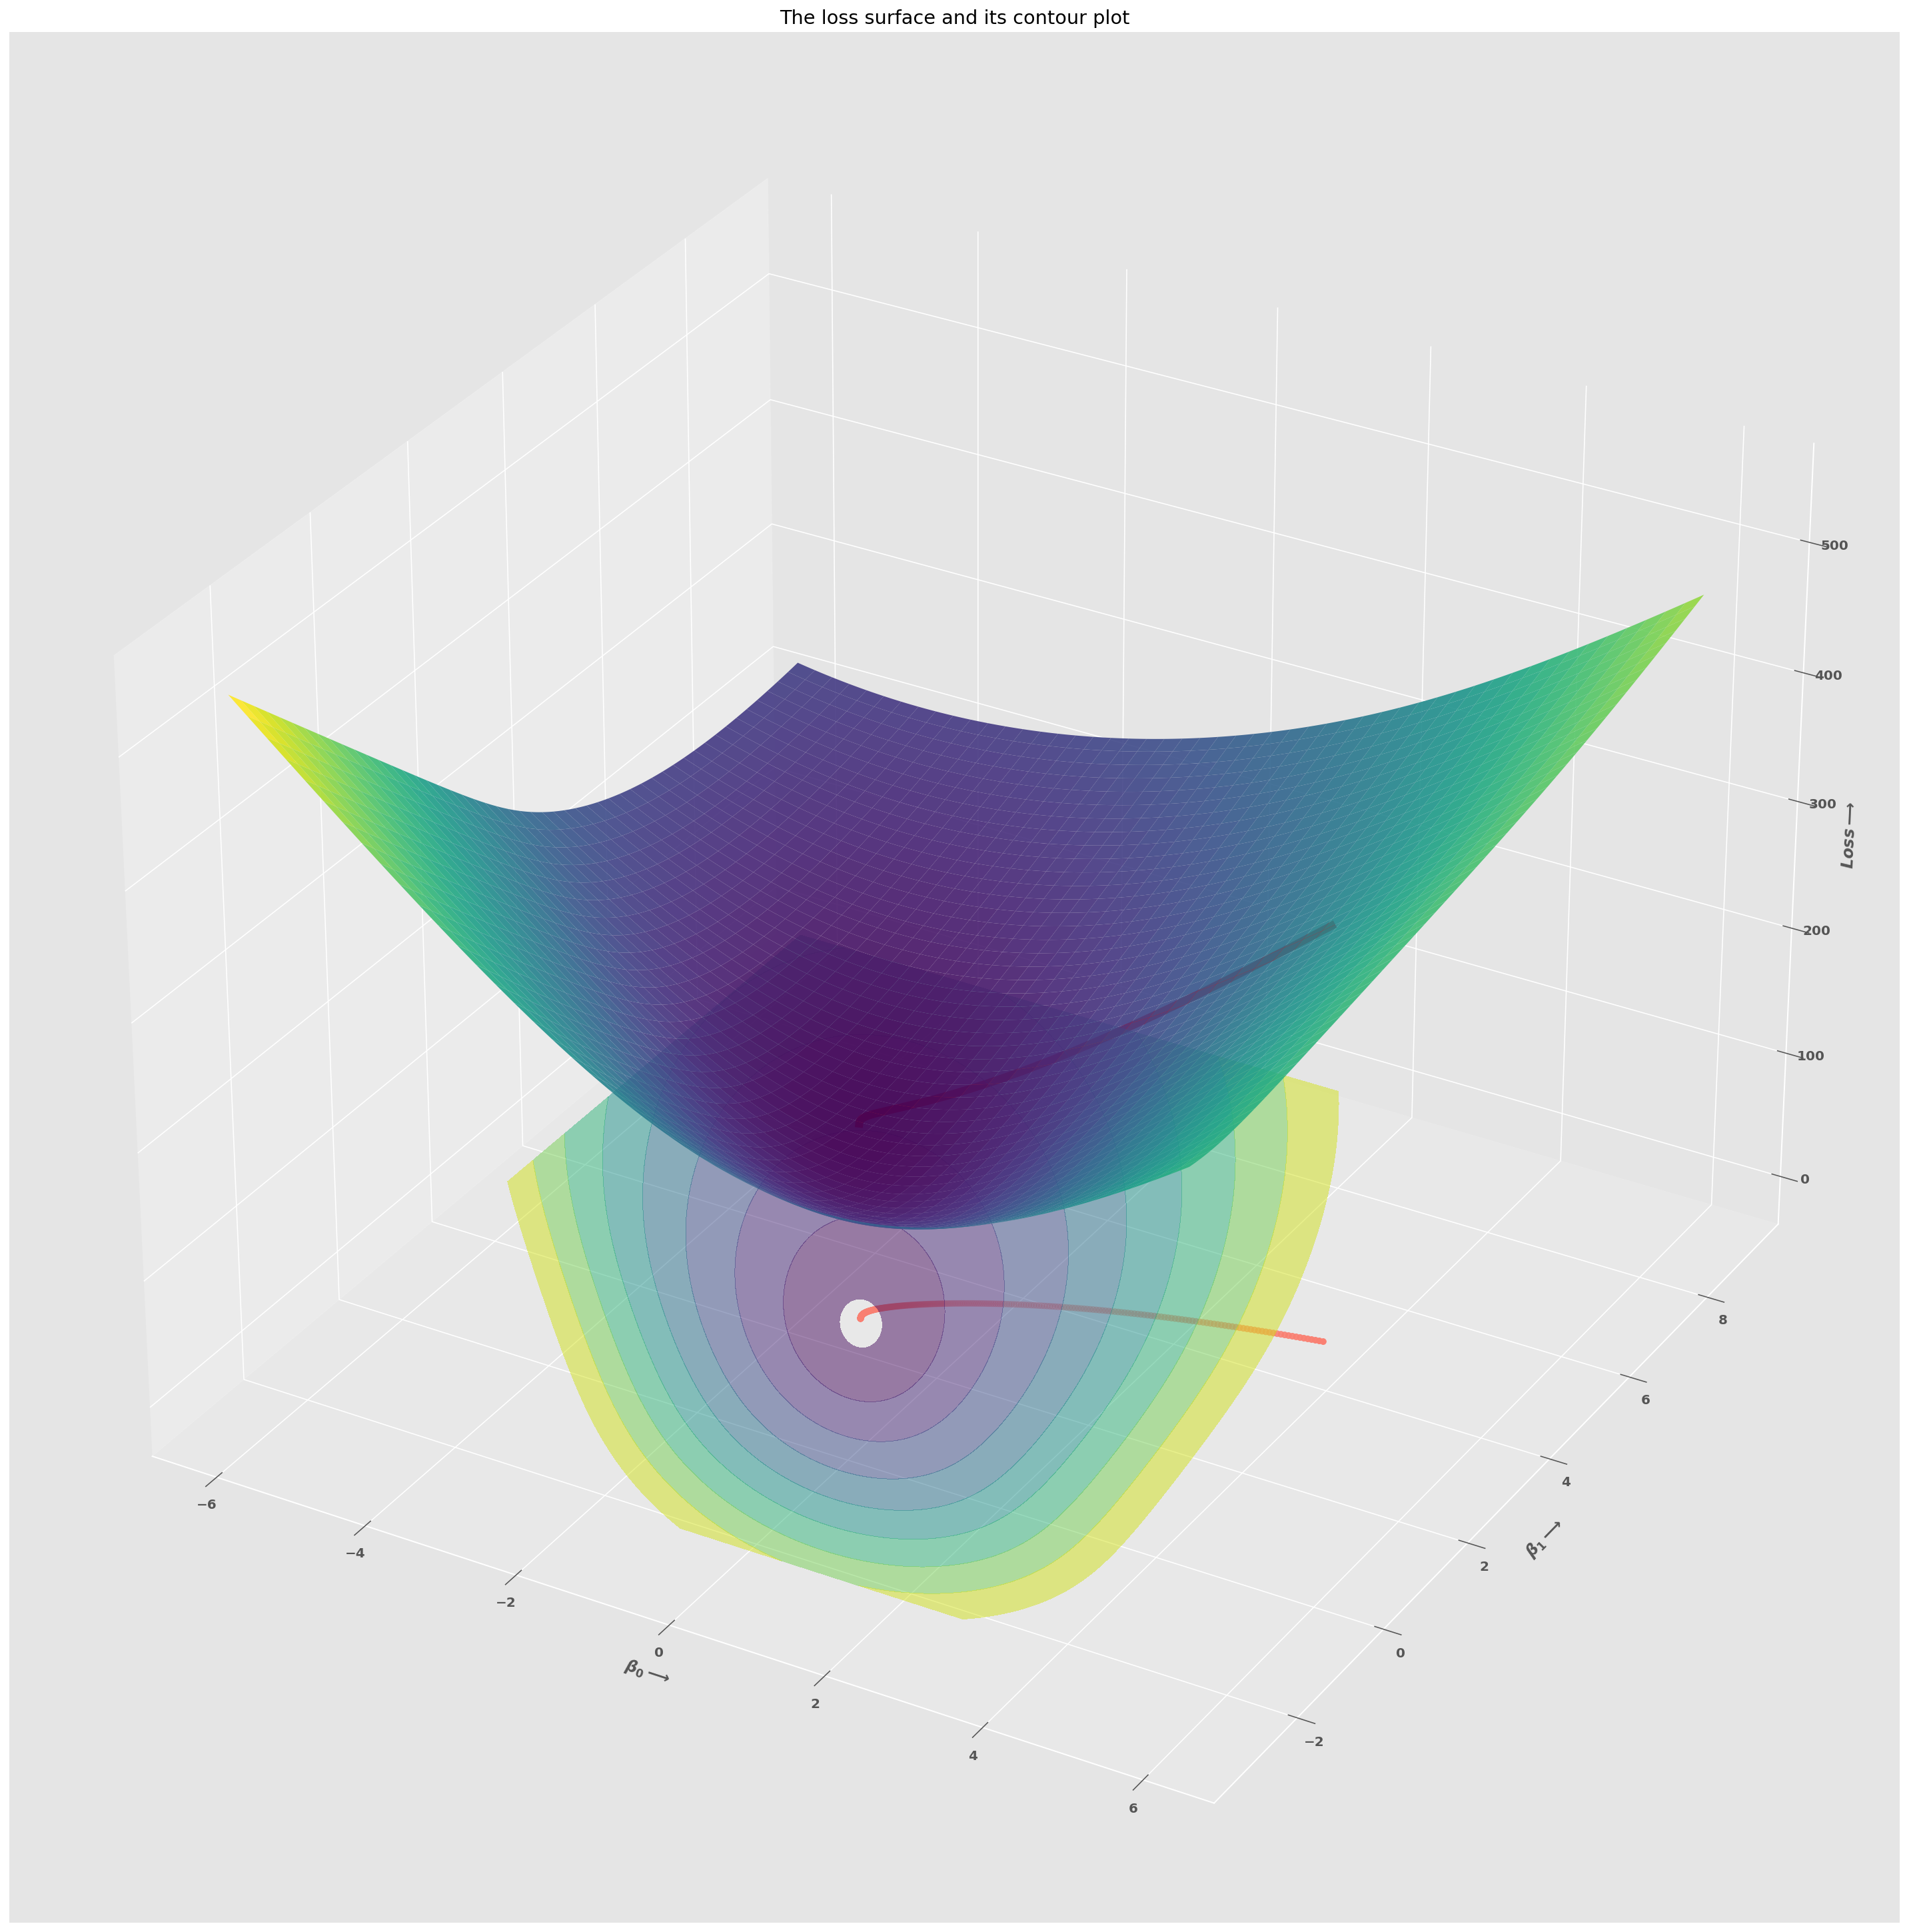

In [ ]:
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(111, projection='3d')
loss_lift = 100 # artificially lifing the loss surface to better show the contour plot below it.

#Plot the loss surface
ax.plot_surface(B0, B1, loss_lift + (rss),
                cmap='viridis', alpha=0.9)

levels=[56, 65, 80, 100, 120, 140, 160, 180, 200]

# Plot the contours
ax.contourf(B0, B1, rss, levels, offset = 0, alpha=0.5)
plt.xlabel(r'$\beta_0\longrightarrow$')
plt.ylabel(r'$\beta_1\longrightarrow$')
ax.set_zlabel(r'$Loss\longrightarrow$')

# Plot the learning journey
ax.plot(intermediates.β0, intermediates.β1, intermediates.loss + loss_lift,  color='red',zdir='z', linewidth=6)
ax.scatter(intermediates.β0, intermediates.β1, s=20,  color='salmon',zdir='z')
plt.title(r'The loss surface and its contour plot')
plt.tight_layout()